<a href="https://colab.research.google.com/github/WZ151/weik151/blob/master/%E7%94%A8KNN%E5%AF%B9%E9%B8%A2%E5%B0%BE%E8%8A%B1%E6%95%B0%E6%8D%AE%E8%BF%9B%E8%A1%8C%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [441]:
#-*- coding: utf-8 -*-
from sklearn import datasets
import pandas as pd
import numpy as np
import random
from math import sqrt
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 读取数据

## 读取x


In [442]:
df=pd.DataFrame(datasets.load_iris().data,columns=["A","B","C","D"])

## 读取y


In [443]:
df["Y"]=datasets.load_iris().target

#相关函数 

函数：生成指定长度内指定数量的不重复的整数随机数，length 必须大于 num

In [444]:
def lenth_rand(length,num):
  assert length>=num,"length 必须大于 num"
  result=[]
  i=0
  while i <= num-1:
    tmp=random.randint(0,length-1)
    if tmp not in result:
      result.append(tmp)
      i+=1
  
  return result

# 相关类


1.对样本分组 

2.建立一个类，输入的是k与（xy或者x），前者是训练集，后者是预测集或者测试集
输入是dataframe格式

3.算出Xi和其他点的距离

4.对距离进行排序

5.选择K个最相近的点

6.得到总数和各个类型所占的比例


In [445]:
class KnnClass:
    def __init__(self,k):
        self.k=k

    def fill(self,x,y):
        self._x=np.array(x)
        self._y=np.array(y)
        return self
    
    def predict(self,x):

      return [self._predict(_x) for _x in np.array(x)]

    # def predict(self,x):
    #   return [self._predict(np.array(x)[10])]

    #针对每一个的x数组的预测哈
    def _predict(self,_x):
      #算距离

      distincts=[sqrt(  np.sum( (_x-tmp_x)**2 )  ) for tmp_x in np.array(self._x)]
      #将所属类别加上
      df_p=pd.DataFrame(distincts,columns=["dis"])
      df_p["sort"]=np.array(self._y)
      #对距离进行排序
      
      df_p=df_p.sort_values(by="dis")

      self.tmp=df_p
      #得到预测的分类值
      
      df_p_1=df_p.reset_index(drop=True)
      df_p_1=df_p_1.loc[0:self.k].sort.value_counts().index[0]
      return df_p_1
      

# 划分训练集和测试集

In [446]:
train_index=lenth_rand(150,105)
test_index=set(range(150)).difference(set(train_index))
train_x=df.loc[train_index,["A","B","C","D"]]
train_y=df.loc[train_index,["Y"]]
test_x=df.loc[test_index,["A","B","C","D"]]
test_y=df.loc[test_index,["Y"]]

# K从2到10，去寻找最优的K

In [447]:
scatter_x=[]
scatter_y=[]
for i in range(1,11):

  tmp=KnnClass(i)
  tmp.fill(train_x,train_y)
  a=tmp.predict(test_x)
  scatter_x.append(i)
  scatter_y.append(accuracy_score(a,test_y))


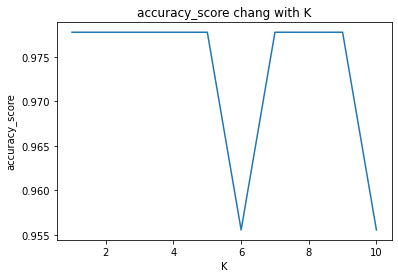

In [448]:
plt.plot(scatter_x,scatter_y)
plt.title("accuracy_score chang with K")
plt.xlabel("K")
plt.ylabel("accuracy_score")
plt.show()